# Assignment 1 - Exploratory Data Analysis

## Instructions

For the First Assignment, we are going to be Performing Exploratory Data Analysis Using Python, R and Weka.

1. There are set of questions that may be similar for python and R but may be different for Weka.
2. The dataset used for Python/R are same but different for Weka.
3. For Task involving R use a different R notebook.
3. Each Task is presenting a challenge.

## Task 1: Python (40 Points)

Run this cell by default to load the dataset.

The data contains intakes and outcomes of animals entering the Animal Center from the beginning of October 2013 to the present day.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

animal_data = pd.read_csv("/content/Animal_Center_Intakes.csv")

animal_data.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01-03-2019 16:19,01-03-2019 16:19,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07-05-2015 12:59,07-05-2015 12:59,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


### Task 1A: 2 points
Display all the details about the dataset

In [3]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [4]:
#code to display to numeric stats for the given dataset
animal_data.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,124120,85069,124120,124120,124120,124120,124120,124120,124119,124120,124120,124120
unique,110926,19748,87660,87660,53704,6,10,5,5,52,2629,595
top,A721033,Max,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,564,64,64,22859,86455,107952,70447,40316,21794,30985,13034


### Task 1B: 4 points
1. Check for null values within each column.
2. Fill the values for more than 100 missing columns with certain label such as Not available, Not Name, etc. Drop the rows for the rest missing columns.
3. Convert the date columns into appropriate type.

In [5]:
# Check for null values in each column
null_cnts = animal_data.isnull().sum()
print(null_cnts)

Animal ID               0
Name                39051
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64


In [6]:
# Threshold for considering columns
a = 100

# Fill missing values with a specific label for columns with more than 100 missing values
c_to_fill = animal_data.columns[animal_data.isnull().sum() > a]
animal_data[c_to_fill] = animal_data[c_to_fill].fillna('Not Available')

# Drop rows for columns with fewer than 100 missing values
c_to_drop = animal_data.columns[animal_data.isnull().sum() <= a]
animal_data = animal_data.dropna(subset=c_to_drop)

# Display the resulting DataFrame
animal_data



,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01-03-2019 16:19,01-03-2019 16:19,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07-05-2015 12:59,07-05-2015 12:59,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,Not Available,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
...,...,...,...,...,...,...,...,...,...,...,...,...
124115,A828158,Odin,01-08-2021 19:01,01-08-2021 19:01,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan
124116,A830183,Not Available,03-03-2021 17:12,03-03-2021 17:12,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White
124117,A830180,Gigi,03-03-2021 16:31,03-03-2021 16:31,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White
124118,A830171,Not Available,03-03-2021 17:13,03-03-2021 17:13,1310 West Howard Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Plott Hound Mix,Brown Brindle/White


In [ ]:
null_counts = animal_data.isnull().sum()
print(null_counts)


Animal ID           0
Name                0
DateTime            0
MonthYear           0
Found Location      0
Intake Type         0
Intake Condition    0
Animal Type         0
Sex upon Intake     0
Age upon Intake     0
Breed               0
Color               0
dtype: int64


In [ ]:


# List of date columns to convert
date_columns = ['DateTime', 'MonthYear']

# Loop through the date columns and convert them to datetime type
for column in date_columns:
    animal_data[column] = pd.to_datetime(animal_data[column])

# Now, the specified date columns are in datetime format


In [ ]:
animal_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124112 entries, 0 to 124119
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         124112 non-null  object        
 1   Name              124112 non-null  object        
 2   DateTime          124112 non-null  datetime64[ns]
 3   MonthYear         124112 non-null  datetime64[ns]
 4   Found Location    124112 non-null  object        
 5   Intake Type       124112 non-null  object        
 6   Intake Condition  124112 non-null  category      
 7   Animal Type       124112 non-null  object        
 8   Sex upon Intake   124112 non-null  object        
 9   Age upon Intake   124112 non-null  object        
 10  Breed             124112 non-null  object        
 11  Color             124112 non-null  object        
 12  Age Category      124112 non-null  object        
dtypes: category(1), datetime64[ns](2), object(10)
memory usage:

### Task 1C: 4 points
1. Plot the Age Intake column and observe the distribution.
2. Group certain values into categories,
- Less than 1 week, Less than 1 month, Less than 1 year
- Drop inappropriate negative valued years rows.
3. Plot the Column to again see the new distributuions.

Tip: consider 0 years as less than 1 year.

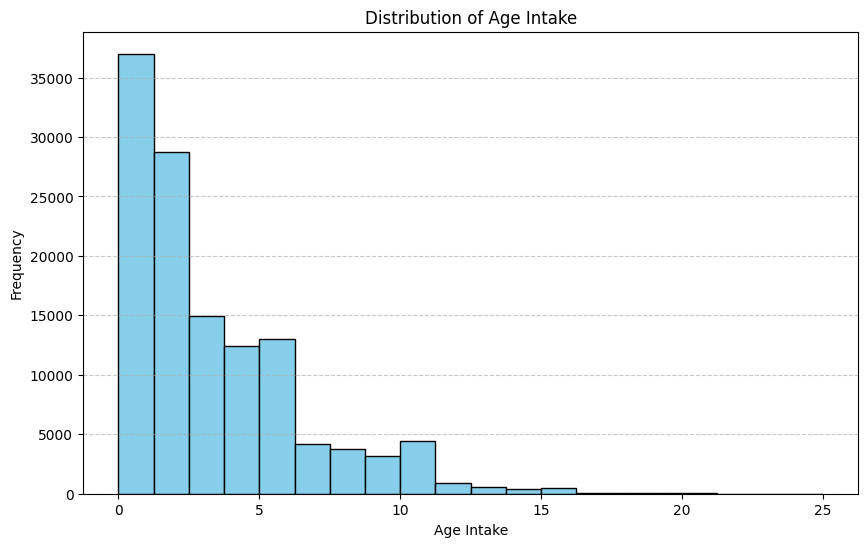

In [ ]:

# Convert the 'Age upon Intake' column to a numerical format
animal_data['Age Intake'] = animal_data['Age upon Intake'].str.extract('(\d+)').astype(float)

# Filtering out negative and extreme values (e.g., ages above 100)
animal_data = animal_data[(animal_data['Age Intake'] >= 0) & (animal_data['Age Intake'] <= 100)]

# Creating a histogram to observe the distribution of the 'Age Intake' column
plt.figure(figsize=(10, 6))
plt.hist(animal_data['Age Intake'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age Intake')
plt.ylabel('Frequency')
plt.title('Distribution of Age Intake')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Group certain values into categories,
# - Less than 1 week, Less than 1 month, Less than 1 year
# - Drop inappropriate negative valued years rows.

In [9]:
# Clean the data by categorizing and dropping inappropriate values
def categorize_age(age_str):
    try:
        # Extract numeric value and unit (e.g., years, months, weeks, days)
        age_parts = age_str.split()
        age = int(age_parts[0])  # Extract the numeric part and convert to an integer
        unit = age_parts[1].lower()  # Extract the unit and convert to lowercase

        # Convert all units to days for consistent comparison
        if unit == 'year' or unit == 'years':
            age_in_days = age * 365
        elif unit == 'month' or unit == 'months':
            age_in_days = age * 30
        elif unit == 'week' or unit == 'weeks':
            age_in_days = age * 7
        elif unit == 'day' or unit == 'days':
            age_in_days = age
        else:
            return None  # Handle unknown units

        if age_in_days < 0:
            return None  # Drop negative values
        elif age_in_days < 7:
            return 'Less than 1 week'
        elif age_in_days < 30:
            return 'Less than 1 month'
        else:
            return 'Less than 1 year'
    except (ValueError, IndexError):
        return None  # Handle non-numeric or improperly formatted values

# Apply the categorization function to the 'Age upon Intake' column
animal_data['Age Category'] = animal_data['Age upon Intake'].apply(categorize_age)

#checking whether the age column is updated as required

In [10]:
# Print unique values in the 'Age Category' column
print(animal_data['Age Category'].unique())


['Less than 1 year' 'Less than 1 month' 'Less than 1 week' None]


Plotting the graph to understand the updated classification

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Drop rows with missing values (e.g., those with negative ages or non-numeric values)
animal_data.dropna(subset=['Age Category'], inplace=True)

# Plot the new distribution of the 'Age Category' column
agecounts = animal_data['Age Category'].value_counts().reset_index()
agecounts.columns = ['Age Category', 'Count']

# Define your custom colors
custom_colors = ['#800080', '#ffb6c1', '#730d3e']

# Create an interactive bar plot with custom colors using Plotly
fig = go.Figure(data=[
    go.Bar(x=agecounts['Age Category'], y=agecounts['Count'],
           marker_color=custom_colors)
])

# Customize the layout
fig.update_layout(
    title='Distribution of Age Categories',
    xaxis_title='Age Category',
    yaxis_title='Count',
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',  # Plot background color
    font=dict(color='white'),  # Font color
)

# Show the interactive plot
fig.show()


From the above plot, we can interpret that groping the data as less than week, month, and year, helps in understanding the patterns better than it was before.

### Task 1D: 2 points
Print Top 15 locations where animals were found.

In [13]:
from tabulate import tabulate
# Use value_counts() to count occurrences of each unique location
found_loc_counts = animal_data['Found Location'].value_counts()

# Get the top 15 locations
top_15_loc = found_loc_counts.head(15)

# Create a DataFrame for the top locations
top_loc_df = pd.DataFrame({'Found Location': top_15_loc.index, 'Count': top_15_loc.values})

# Display the top locations in a formatted table
table = tabulate(top_loc_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+---------------------------------------+-------+
|            Found Location             | Count |
+---------------------------------------+-------+
|              Austin (TX)              | 22858 |
|              Travis (TX)              | 1995  |
|         Outside Jurisdiction          | 1529  |
|   7201 Levander Loop in Austin (TX)   |  811  |
|              Manor (TX)               |  620  |
|           Pflugerville (TX)           |  607  |
|            Del Valle (TX)             |  527  |
|   4434 Frontier Trl in Austin (TX)    |  208  |
|   124 W Anderson Ln in Austin (TX)    |  192  |
|  4434 Frontier Trail in Austin (TX)   |  158  |
|             Leander (TX)              |  157  |
|  1156 W Cesar Chavez in Austin (TX)   |  146  |
| 124 West Anderson Lane in Austin (TX) |  139  |
|  12034 Research Blvd in Austin (TX)   |  136  |
|     12034 Research in Austin (TX)     |  113  |
+---------------------------------------+-------+


### Task 1E: 2 points
Print Top 10 breeds with animal type that were stray and were found in between 15 to 20 years old.

In [14]:
# Filter the DataFrame for animals that are "stray" and found between 15 and 20 years old
fil_df = animal_data[(animal_data['Intake Type'] == 'Stray') & (animal_data['Age upon Intake'].str.contains('1[5-9] years|20 years'))]

# Group by breed and animal type, then count occurrences
breed_counts = fil_df.groupby(['Breed', 'Animal Type']).size().reset_index(name='Count')

# Sort the results in descending order by count and get the top 10
top10_breeds = breed_counts.sort_values(by='Count', ascending=False).head(10)

# Display the top 10 breeds in a formatted table
table = tabulate(top10_breeds, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+--------------------------+-------------+-------+
|          Breed           | Animal Type | Count |
+--------------------------+-------------+-------+
|  Domestic Shorthair Mix  |     Cat     |  63   |
| Chihuahua Shorthair Mix  |     Dog     |  53   |
|  Labrador Retriever Mix  |     Dog     |  15   |
|  Domestic Longhair Mix   |     Cat     |  13   |
|    Domestic Shorthair    |     Cat     |  12   |
|   Chihuahua Shorthair    |     Dog     |  12   |
| Domestic Medium Hair Mix |     Cat     |  11   |
|     Rat Terrier Mix      |     Dog     |  10   |
|       Pit Bull Mix       |     Dog     |  10   |
|   German Shepherd Mix    |     Dog     |   9   |
+--------------------------+-------------+-------+


### Task 1F: 4 points
Display horizontal bar graph for Top 10 Locations where animals were found at night time that were sick.

Note: night time = 7pm to 12am

In [ ]:
import pandas as pd
import plotly.express as px

# Convert 'DateTime' column to datetime format
animal_data['DateTime'] = pd.to_datetime(animal_data['DateTime'])

# Filter the DataFrame for animals found at night time and classified as sick
night_time_start = pd.to_datetime('19:00:00').time()
night_time_end = pd.to_datetime('00:00:00').time()
night_time_filter = (animal_data['DateTime'].dt.time >= night_time_start) | (animal_data['DateTime'].dt.time <= night_time_end)
sick_animals_at_night = animal_data[(night_time_filter) & (animal_data['Intake Condition'] == 'Sick')]

# Count occurrences of each unique location
location_counts = sick_animals_at_night['Found Location'].value_counts().head(10).reset_index()
location_counts.columns = ['Found Location', 'Count']

# Create a custom color palette for the bars
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#bcbd22', '#17becf', '#636363']

# Create an interactive horizontal bar graph with custom colors
fig = px.bar(location_counts, y='Found Location', x='Count', color='Count', text='Count',
             title='Top 10 Locations where Sick Animals were Found at Night Time',
             labels={'Found Location': 'Location', 'Count': 'Count'},
             color_discrete_map={'Count': custom_colors},  # Apply custom colors
             orientation='h')

# Customize the layout
fig.update_layout(
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',  # Plot background color
    font=dict(color='white'),  # Font color
    coloraxis_showscale=False  # Hide color scale
)

# Show the interactive plot
fig.show()


### Task 1G: 3 points

Display a pie chart for cat conditions when they were found at '4434 Frontier Trl in Austin (TX)'.

In [23]:
cats_at_location = animal_data[(animal_data['Found Location'] == '4434 Frontier Trl in Austin (TX)') & (animal_data['Animal Type'] == 'Cat')]

# Get unique conditions
unique_con = cats_at_location['Intake Condition'].unique()

# Print the unique conditions
print("Unique Cat Conditions at 4434 Frontier Trl in Austin (TX):")
for condition in unique_con:
    print(condition)

Unique Cat Conditions at 4434 Frontier Trl in Austin (TX):
Nursing
Injured
Normal
Sick
Other


In [16]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame for cats found at '4434 Frontier Trl in Austin (TX)'
cats_at_location = animal_data[(animal_data['Found Location'] == '4434 Frontier Trl in Austin (TX)') & (animal_data['Animal Type'] == 'Cat')]

# Count occurrences of each unique condition
con_counts = cats_at_location['Intake Condition'].value_counts().reset_index()
con_counts.columns = ['Condition', 'Count']

# Define professional colors for the pie chart
colors = ['#800000', '#ff9a00', '#f8b9d4', '#b3446c', '#868686']

# Create an interactive pie chart with a legend
fig = px.pie(con_counts, values='Count', names='Condition', color_discrete_sequence=colors, hole=0.5,
             title='Cat Conditions at 4434 Frontier Trl in Austin (TX)',
             labels={'Condition': 'Intake Condition', 'Count': 'Count'},
             template='plotly_dark')

# Add percentages to the legend
fig.update_traces(textinfo='percent+label')

# Show the interactive plot
fig.show()


### Task 1H: 4 points
Display a bar chart for Top 10 colors of animal that were surrendered.

Here , I have followed 3 steps to solve this, first of all check the data " surrendered " is under which column .
There fore by head() i have understood that Its intake type .
Now, find the unique values to excatly know how surrender is presented in the database, Goahead and figure out the plot, To make it more interactive, I have used Plotly.

In [ ]:
animal_data.head()


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Age Category,Age Intake
0,A786884,*Brock,2019-01-03 16:19:00,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,Less than 1 year,2.0
1,A706918,Belle,2015-07-05 12:59:00,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,Less than 1 year,8.0
2,A724273,Runster,2016-04-14 18:43:00,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,Less than 1 year,11.0
3,A665644,Not Available,2013-10-21 07:59:00,2013-10-21 07:59:00,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,Less than 1 month,4.0
4,A682524,Rio,2014-06-29 10:38:00,2014-06-29 10:38:00,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,Less than 1 year,4.0


In [17]:
unique_intake_types = animal_data['Intake Type'].unique()
print(unique_intake_types)

['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request'
 'Abandoned']


In [18]:
# Check for leading/trailing spaces in 'Intake Type' column
surrendered_animals = animal_data[animal_data['Intake Type'].str.strip() == 'Owner Surrender']


In [19]:
import pandas as pd
import plotly.express as px

# Count occurrences of each unique color
color_counts = surrendered_animals['Color'].value_counts().head(10).reset_index()
color_counts.columns = ['Color', 'Count']

# Create an interactive bar chart
fig = px.bar(color_counts, x='Color', y='Count',
             color='Color',  # Color bars based on the 'Color' column
             title='Top 10 Colors of Surrendered Animals',
             labels={'Color': 'Color', 'Count': 'Count'},
             template='plotly_dark')

# Customize the layout
fig.update_xaxes(categoryorder='total ascending')  # Sort the x-axis by count
fig.update_xaxes(tickangle=45, tickfont=dict(size=14))  # Rotate x-axis labels for better readability
fig.update_yaxes(title_text='Count', title_font=dict(size=14))  # Set y-axis label
fig.update_traces(texttemplate='%{y}', textposition='outside')  # Display count values on top of bars

# Show the interactive plot
fig.show()


### Task 1I: 6 points

Display a 2 by 2 graphs where spots are defined as
1. Pie chart for intake type.
2. Pie chart for Intake Condition
3. Pie chart for Animal Type.
4. Horizontal Distribution for Intake condition for Dogs.

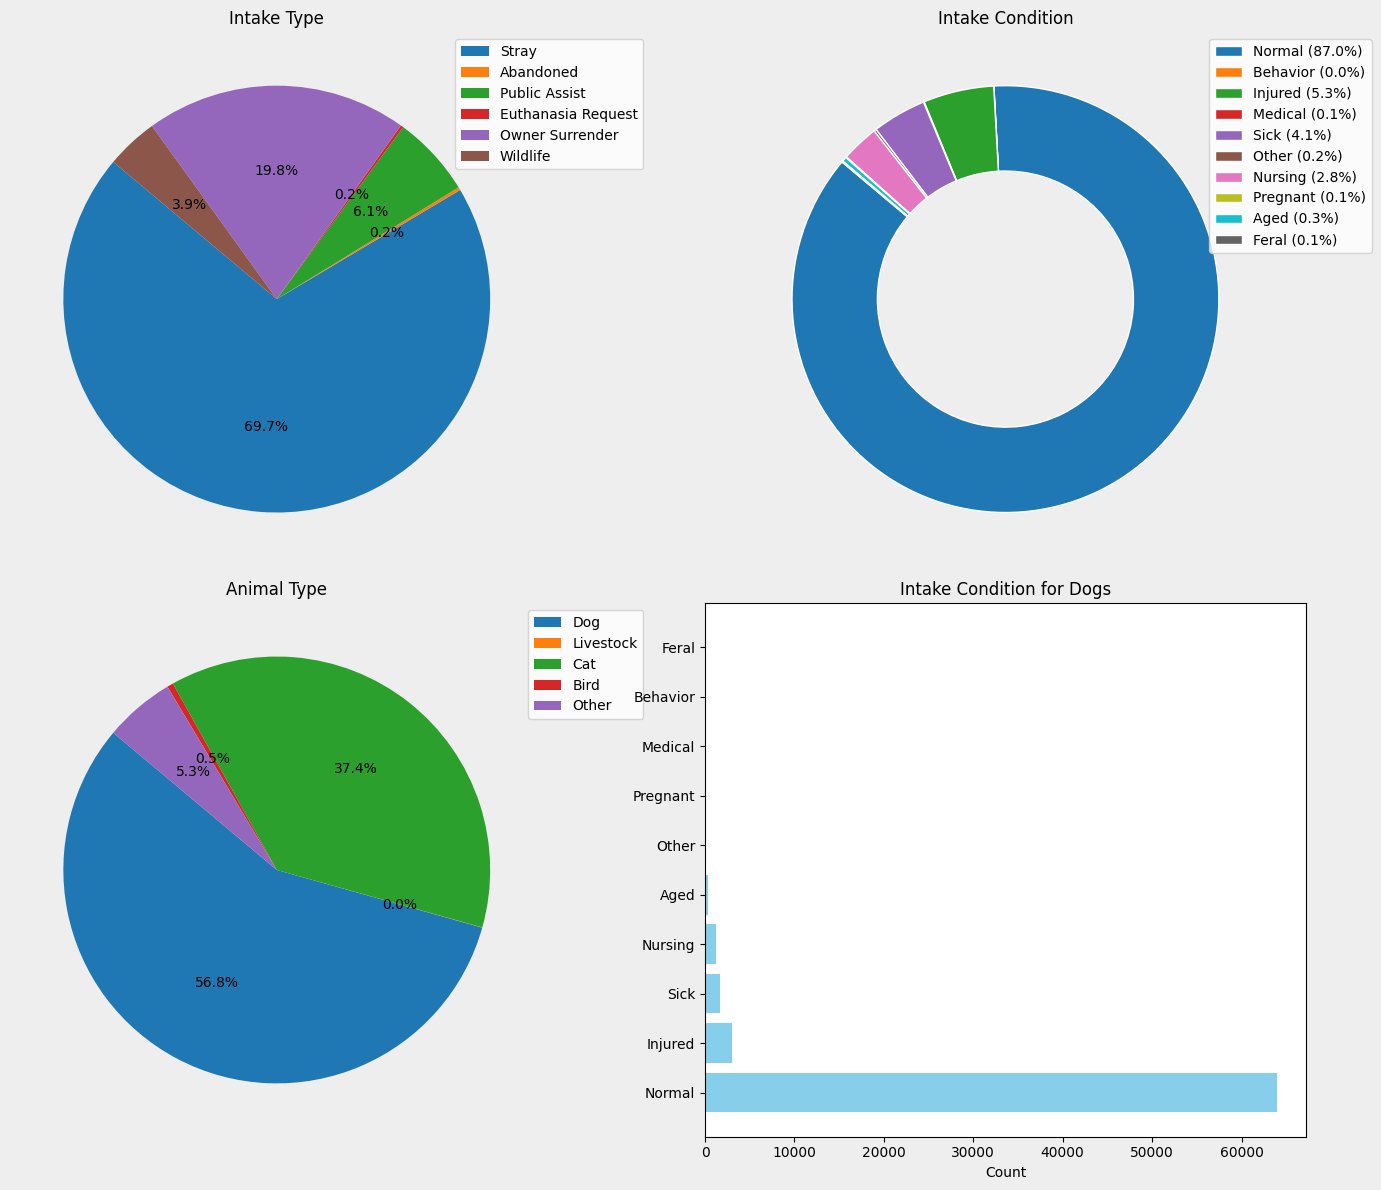

In [ ]:


# Create a 2x2 grid of subplots with a larger figure size
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.patch.set_facecolor('#eeeeee')

# Function to customize the order of slices
def customize_pie_chart_order(data_series):
    # Sort the data series in the desired order
    custom_order = ['Stray', 'Abandoned','Public Assist', 'Euthanasia Request','Owner Surrender', 'Wildlife']
    data_sorted = data_series.loc[custom_order]
    return data_sorted

# Plot 1: Pie chart for Intake Type (customized order)
intake_type_counts = animal_data['Intake Type'].value_counts()
intake_type_counts_custom = customize_pie_chart_order(intake_type_counts)
axes[0, 0].pie(intake_type_counts_custom, labels=None, autopct='%1.1f%%', startangle=140)
axes[0, 0].set_title('Intake Type')
axes[0, 0].legend(intake_type_counts_custom.index, loc='upper right', bbox_to_anchor=(1.2, 1))




# Function to customize the order of slices
def customize_pie_chart_order(data_series):
    # Sort the data series in the desired order
    custom_order = ['Dog', 'Livestock','Cat', 'Bird',  'Other']
    data_sorted = data_series.loc[custom_order]
    return data_sorted

# Plot 3: Pie chart for Animal Type (customized order)
animal_type_counts = animal_data['Animal Type'].value_counts()
animal_type_counts_custom = customize_pie_chart_order(animal_type_counts)

axes[1, 0].pie(animal_type_counts_custom, labels=None, autopct='%1.1f%%', startangle=140)
axes[1, 0].set_title('Animal Type')
axes[1, 0].legend(animal_type_counts_custom.index, loc='upper right', bbox_to_anchor=(1.2, 1))



# Function to customize the order of slices
def customize_pie_chart_order(data_series):
    # Sort the data series in the desired order
    custom_order = ['Normal', 'Behavior', 'Injured', 'Medical', 'Sick', 'Other', 'Nursing', 'Pregnant', 'Aged', 'Feral']
    data_sorted = data_series.loc[custom_order]
    return data_sorted

# Plot 2: Pie chart for Intake Condition (customized order)
intake_condition_counts = animal_data['Intake Condition'].value_counts()
intake_condition_counts_custom = customize_pie_chart_order(intake_condition_counts)

# Define colors for each condition
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#bcbd22', '#17becf', '#636363']

# Calculate percentages for the legend
percentages = (intake_condition_counts_custom / intake_condition_counts_custom.sum() * 100).round(1)
legend_labels = [f'{label} ({percentage}%)' for label, percentage in zip(intake_condition_counts_custom.index, percentages)]

# Create the pie chart with a gap between slices
wedgeprops = {'width': 0.4, 'edgecolor': 'w'}  # Adjust the 'width' to control the gap
axes[0, 1].pie(intake_condition_counts_custom, labels=None, startangle=140, colors=colors, wedgeprops=wedgeprops)
axes[0, 1].set_title('Intake Condition')

# Add the legend with labels and percentages
axes[0, 1].legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))


# Plot 4: Horizontal Distribution for Intake Condition for Dogs
dogs_df = animal_data[animal_data['Animal Type'] == 'Dog']
intake_condition_dogs_counts = dogs_df['Intake Condition'].value_counts()
axes[1, 1].barh(intake_condition_dogs_counts.index, intake_condition_dogs_counts.values, color='skyblue')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Intake Condition for Dogs')



# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


# **I've crafted a visually captivating rendition of "Plot 2" using Plotly to elevate its visual appeal and engagement.**

In [ ]:


# Customize the order of slices if needed
custom_order = ['Normal', 'Behavior', 'Injured', 'Medical', 'Sick', 'Other', 'Nursing', 'Pregnant', 'Aged', 'Feral']
animal_data['Intake Condition'] = pd.Categorical(animal_data['Intake Condition'], categories=custom_order, ordered=True)

# Group data and calculate counts
intake_condition_counts = animal_data['Intake Condition'].value_counts().reset_index()
intake_condition_counts.columns = ['Condition', 'Count']

# Create a pie chart with tooltips
fig = px.pie(intake_condition_counts, names='Condition', values='Count', title='Intake Condition')

# Customize background and label text color
fig.update_layout(
    paper_bgcolor='black',  # Set background color to black
    font=dict(color='white')  # Set label text color to white
)

fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # Pull slices apart
fig.show()


### Task 1J: 3 points
Print Top 10 Breeds of animal who were less than a year old when they were taken in along with what type of animal they were.

In [ ]:
animal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124112 entries, 0 to 124119
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         124112 non-null  object        
 1   Name              124112 non-null  object        
 2   DateTime          124112 non-null  datetime64[ns]
 3   MonthYear         124112 non-null  object        
 4   Found Location    124112 non-null  object        
 5   Intake Type       124112 non-null  object        
 6   Intake Condition  124112 non-null  category      
 7   Animal Type       124112 non-null  object        
 8   Sex upon Intake   124112 non-null  object        
 9   Age upon Intake   124112 non-null  object        
 10  Breed             124112 non-null  object        
 11  Color             124112 non-null  object        
 12  Age Category      124112 non-null  object        
dtypes: category(1), datetime64[ns](1), object(11)
memory usage:

In [ ]:


# 'Age Category' column is available in our DataFrame
# Filter for animals less than a year old
young_animals = animal_data[animal_data['Age Category'] == 'Less than 1 year']

# Group by breed and animal type, then count the occurrences
breed_counts = young_animals.groupby(['Breed', 'Animal Type']).size().reset_index(name='Count')

# Sort the breeds by count in descending order
top_10_breeds = breed_counts.sort_values(by='Count', ascending=False).head(10)

# Print the top 10 breeds and their corresponding animal types in a table format
print(top_10_breeds.to_string(index=False))


                    Breed Animal Type  Count
   Domestic Shorthair Mix         Cat  22027
             Pit Bull Mix         Dog   8108
   Labrador Retriever Mix         Dog   6457
  Chihuahua Shorthair Mix         Dog   5990
       Domestic Shorthair         Cat   5003
      German Shepherd Mix         Dog   2910
 Domestic Medium Hair Mix         Cat   2431
                  Bat Mix       Other   1725
Australian Cattle Dog Mix         Dog   1445
                 Pit Bull         Dog   1300



1. **Comparison of Animal Types**: The data shows that there are two primary animal types, "Cat" and "Dog," with "Other" representing a smaller category. Dogs, collectively represented by various mixes and specific breeds like "Pit Bull" and "Labrador Retriever," outnumber cats in the shelter.

2. **Diversity in Cat Breeds**: Among the cats, "Domestic Shorthair Mix" and "Domestic Medium Hair Mix" are the most common breeds, with "Domestic Shorthair" also present. This suggests a diverse population of domestic cats in the shelter.

3. **Popular Dog Mixes**: Among dogs, "Pit Bull Mix" and "Labrador Retriever Mix" are the two most prevalent mixes, with "Chihuahua Shorthair Mix" and "German Shepherd Mix" following closely. This highlights the popularity of mixed-breed dogs in the shelter.

4. **Notable Breed Counts**: While "Pit Bull Mix" is a common mix, there are also a notable number of "Pit Bull" dogs. The presence of specific breed categories like "German Shepherd Mix" and "Australian Cattle Dog Mix" indicates diversity in the dog breeds available for adoption.

5. **Minority Category**: "Bat Mix" is a relatively rare category, suggesting the presence of animals with less common classifications in the shelter, possibly including exotic or unconventional pets.

### Task 1K: 6 points
1. Print the count of distinct sex intake from 2015 to 2020.
2. Display a side by side bar graph this.

In [ ]:
# Convert the 'DateTime' column to datetime format
animal_data['DateTime'] = pd.to_datetime(animal_data['DateTime'])

# Filter data for the years 2015 to 2020
filtered_data = animal_data[(animal_data['DateTime'].dt.year >= 2015) & (animal_data['DateTime'].dt.year <= 2020)]

# Count the distinct 'Sex upon Intake' values
sex_counts = filtered_data['Sex upon Intake'].value_counts()

# Print the count of distinct 'Sex upon Intake' values
print(sex_counts)


Intact Male      32353
Intact Female    30737
Neutered Male    15536
Spayed Female    13105
Unknown           8505
Name: Sex upon Intake, dtype: int64


In [ ]:
import pandas as pd
import plotly.express as px

# Convert the 'DateTime' column to datetime format
animal_data['DateTime'] = pd.to_datetime(animal_data['DateTime'])

# Filter data for the years 2015 to 2020
filtered_data = animal_data[(animal_data['DateTime'].dt.year >= 2015) & (animal_data['DateTime'].dt.year <= 2020)]

# Count the distinct 'Sex upon Intake' values
sex_counts = filtered_data['Sex upon Intake'].value_counts().reset_index()
sex_counts.columns = ['Sex upon Intake', 'Count']

# Define custom colors
custom_colors = {
    'Intact Male': '#800080',
    'Spayed Female': '#b61481',
    'Neutered Male': '#750d53',
    'Unknown': '#515151'
}

# Create an interactive bar graph using Plotly with custom colors
fig = px.bar(sex_counts, x='Sex upon Intake', y='Count', color='Sex upon Intake',
             title='Count of Distinct Sex upon Intake (2015-2020)', labels={'Count': 'Count'},
             text='Count', height=500, color_discrete_map=custom_colors)

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    paper_bgcolor='black',  # Background color
    font=dict(color='white')  # Label color
)


# Show the interactive plot
fig.show()


## Task 2: R(40 Points)

Perform all the task for R where the data and the questions are same as that for Task 1.

Use a different R notebook.

## Task 3: Weka (20 Points)
1. For this task you will be using the "CarPrice.csv" data file.
2. Load the data into Weka and perform the analysis asked for each question.
3. Load and Display the clear screenshot for each question analysis respectively.

Note: Target variable is 'price'

### Task 3A: 3 points
Display visualization for each column

### Task 3B: 3 points
Display car length vs highway mpg with reaction to target variable.
Interpret the graph.

In [ ]:
# Comment your interpretations.

### Task 3C: 3 points

Display peak rpm vs horsepower with reaction to target variable. Interpret your graph.

In [ ]:
# Comment your interpretations here

### Task 3D: 3 points

Display horsepower vs cylindernumber in reaction to the target variable. Interpret your graph.

In [ ]:
# Comment your interpretations

### Task 3E: 3 points

Display engine size vs fuel system in reaction to the target variable. Interpret your graph.

In [ ]:
# Comment your interpretations

### Task 3F: 5 points

Display curbweight vs citympg in reaction to the target variable. Interpret your graph.

### Programming Assignment Details

1. If using any resource (books, internet), please make sure that you cite it within that cell.
2. Do not rename the dataset_files.
3. Include the Images from the Weka analysis in the submission folder with each image named with the Task(eg: Task3B, Task3C, etc).

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819_python.ipynb, abc_1234_def_5678_xyz3819_R.ipynb

### NOTE: Only one team member will submit the file.